This dataset reflects incidents of crime in the City of Los Angeles dating back to 2020. 

This dataset reflects incidents of crime in the City of Los Angeles dating back to 2020. This data is transcribed from original crime reports that are typed on paper and therefore there may be some inaccuracies within the data. Some location fields with missing data are noted as (0°, 0°). Address fields are only provided to the nearest hundred block in order to maintain privacy. This data is as accurate as the data in the database.

In [1]:
#Let's import the differnt libraries to be used in the data set


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting the data
# Plot correlation matrix
import seaborn as sns # for plotting the matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [3]:
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918438,241605270,02/11/2024 12:00:00 AM,02/11/2024 12:00:00 AM,1920,16,Foothill,1681,2,888,TRESPASSING,...,AA,Adult Arrest,888.0,NaN,NaN,NaN,8700 SHARP AV,NaN,34.2278,-118.4051
918439,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
918440,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
918441,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918443 entries, 0 to 918442
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           918443 non-null  int64  
 1   Date Rptd       918443 non-null  object 
 2   DATE OCC        918443 non-null  object 
 3   TIME OCC        918443 non-null  int64  
 4   AREA            918443 non-null  int64  
 5   AREA NAME       918443 non-null  object 
 6   Rpt Dist No     918443 non-null  int64  
 7   Part 1-2        918443 non-null  int64  
 8   Crm Cd          918443 non-null  int64  
 9   Crm Cd Desc     918443 non-null  object 
 10  Mocodes         790151 non-null  object 
 11  Vict Age        918443 non-null  int64  
 12  Vict Sex        796365 non-null  object 
 13  Vict Descent    796356 non-null  object 
 14  Premis Cd       918433 non-null  float64
 15  Premis Desc     917886 non-null  object 
 16  Weapon Used Cd  317500 non-null  float64
 17  Weapon Des

In [5]:
data.shape

(918443, 28)

In [6]:
data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.184430e+05,918443.000000,918443.000000,918443.000000,918443.000000,918443.000000,918443.000000,918433.000000,317500.000000,918432.000000,66784.000000,2251.000000,65.000000,918443.000000,918443.000000
mean,2.182520e+08,1337.260666,10.701887,1116.626374,1.410659,500.832354,29.573729,306.578338,363.482567,500.575810,957.958104,983.730786,987.353846,33.989769,-118.062475
std,1.205523e+07,652.784076,6.101791,610.196881,0.491954,207.584858,21.858617,217.402431,123.709042,207.377428,110.611792,52.636687,41.137130,1.693282,5.869872
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,740.000000,0.000000,-118.667600
25%,2.104105e+08,900.000000,6.000000,615.000000,1.000000,331.000000,0.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.014500,-118.429700
50%,2.205166e+08,1415.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058700,-118.322100
75%,2.305083e+08,1900.000000,16.000000,1615.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163600,-118.273900
max,2.499046e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [7]:
data.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [8]:
data.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           128292
Vict Age               0
Vict Sex          122078
Vict Descent      122087
Premis Cd             10
Premis Desc          557
Weapon Used Cd    600943
Weapon Desc       600943
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          851659
Crm Cd 3          916192
Crm Cd 4          918378
LOCATION               0
Cross Street      774119
LAT                    0
LON                    0
dtype: int64

In [9]:
data.nunique()

DR_NO             918443
Date Rptd           1539
DATE OCC            1539
TIME OCC            1439
AREA                  21
AREA NAME             21
Rpt Dist No         1208
Part 1-2               2
Crm Cd               139
Crm Cd Desc          139
Mocodes           299931
Vict Age             104
Vict Sex               5
Vict Descent          20
Premis Cd            314
Premis Desc          306
Weapon Used Cd        79
Weapon Desc           79
Status                 6
Status Desc            6
Crm Cd 1             141
Crm Cd 2             126
Crm Cd 3              37
Crm Cd 4               7
LOCATION           65312
Cross Street       10087
LAT                 5415
LON                 4974
dtype: int64

In [10]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
918438    False
918439    False
918440    False
918441    False
918442    False
Length: 918443, dtype: bool

Data Cleaning and Conversion

In [11]:
# Handle the missing values
data['Mocodes'] = data['Mocodes'].fillna('Unknown')
data['Vict Sex'] = data['Vict Sex'].fillna('Unknown')
data['Vict Descent'] = data['Vict Descent'].fillna('Unknown')
data['Premis Cd'] = data['Premis Cd'].fillna(-1)
data['Premis Desc'] = data['Premis Desc'].fillna('Unknown')
data['Weapon Used Cd'] = data['Weapon Used Cd'].fillna(-1)
data['Weapon Desc'] = data['Weapon Desc'].fillna('Unknown')
data['Crm Cd 1'] = data['Crm Cd 1'].fillna(-1)


In [12]:
#Convert the dates' format
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])
data['TIME OCC'] = pd.to_datetime(data['TIME OCC'], format='%H%M', errors='coerce')


/tmp/ipykernel_331/4162122340.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
/tmp/ipykernel_331/4162122340.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])


In [13]:
# remove the unnecessary columns

data.drop(['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'], axis=1, inplace=True) 

In [14]:
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON
0,190326475,2020-03-01,2020-03-01,1900-01-01 21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,STREET,-1.0,Unknown,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,1900-01-01 18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,BUS STOP/LAYOVER (ALSO QUERY 124),-1.0,Unknown,IC,Invest Cont,330.0,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,1900-01-01 17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",-1.0,Unknown,IC,Invest Cont,480.0,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10,1900-01-01 20:37:00,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,CLOTHING STORE,-1.0,Unknown,IC,Invest Cont,343.0,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,2022-08-18,2020-08-17,1900-01-01 12:00:00,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,SIDEWALK,-1.0,Unknown,IC,Invest Cont,354.0,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918438,241605270,2024-02-11,2024-02-11,1900-01-01 19:20:00,16,Foothill,1681,2,888,TRESPASSING,...,SINGLE FAMILY DWELLING,-1.0,Unknown,AA,Adult Arrest,888.0,8700 SHARP AV,NaN,34.2278,-118.4051
918439,241604405,2024-01-14,2024-01-13,1900-01-01 07:20:00,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,STREET,207.0,OTHER KNIFE,IC,Invest Cont,230.0,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
918440,242106032,2024-02-20,2024-02-17,1900-01-01 23:30:00,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,DRIVEWAY,-1.0,Unknown,IC,Invest Cont,420.0,22700 NAPA ST,NaN,34.2260,-118.6214
918441,242004546,2024-01-16,2024-01-16,1900-01-01 15:10:00,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,BUS STOP,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,HOBART BL,3RD ST,34.0690,-118.3054


Analysis and visualization

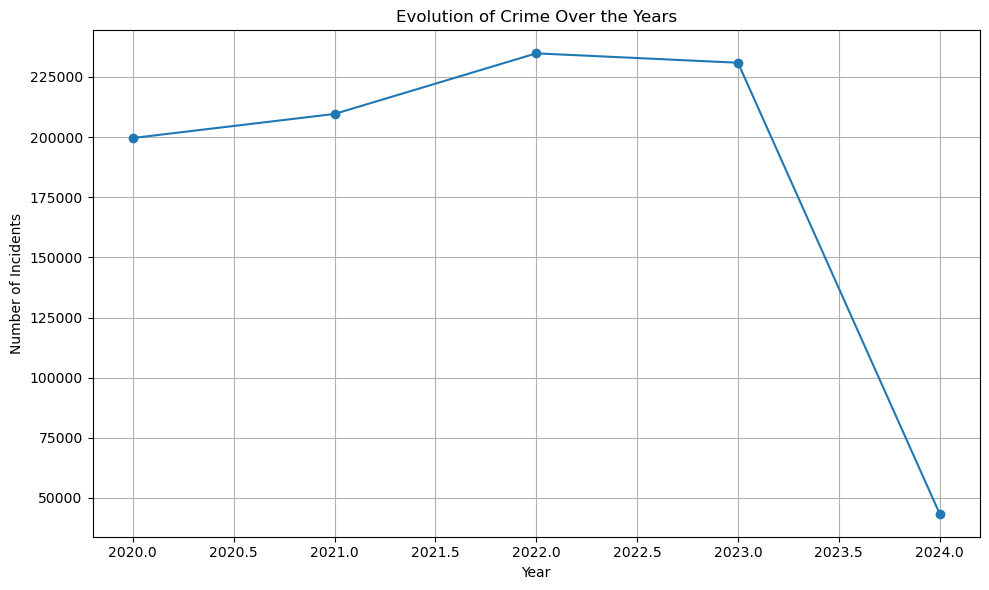

In [15]:
# If not, replace 'Date' with the appropriate column containing the date information
data['Date'] = data['DATE OCC'].dt.year

# Aggregate the data by year
crime_by_year = data.groupby('Date').size().reset_index(name='Crime Count')

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(crime_by_year['Date'], crime_by_year['Crime Count'], marker='o', linestyle='-')
plt.title('Evolution of Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()

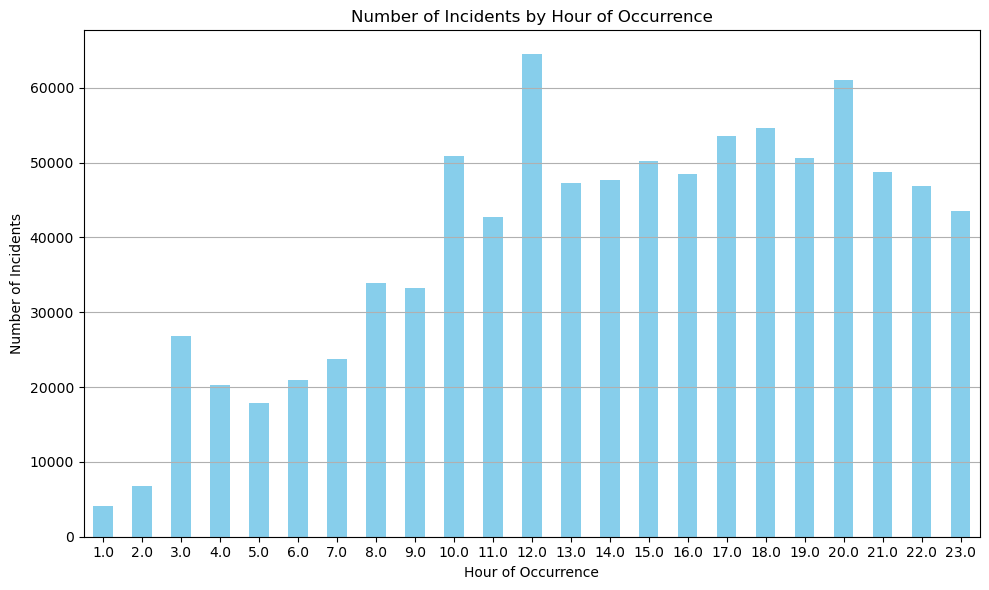

In [16]:
data['Hour'] = data['TIME OCC'].dt.hour

# Drop rows where 'Hour' is NaN
data = data.dropna(subset=['Hour'])

# Count occurrences of each hour
hourly_counts = data['Hour'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Incidents by Hour of Occurrence')
plt.xlabel('Hour of Occurrence')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [17]:
area = data.groupby('AREA NAME')['DR_NO'].count().reset_index()
area

,AREA NAME,DR_NO
0,77th Street,56083
1,Central,61447
2,Devonshire,36820
3,Foothill,29788
4,Harbor,36788
5,Hollenbeck,33478
6,Hollywood,47247
7,Mission,35741
8,N Hollywood,45088
9,Newton,44674


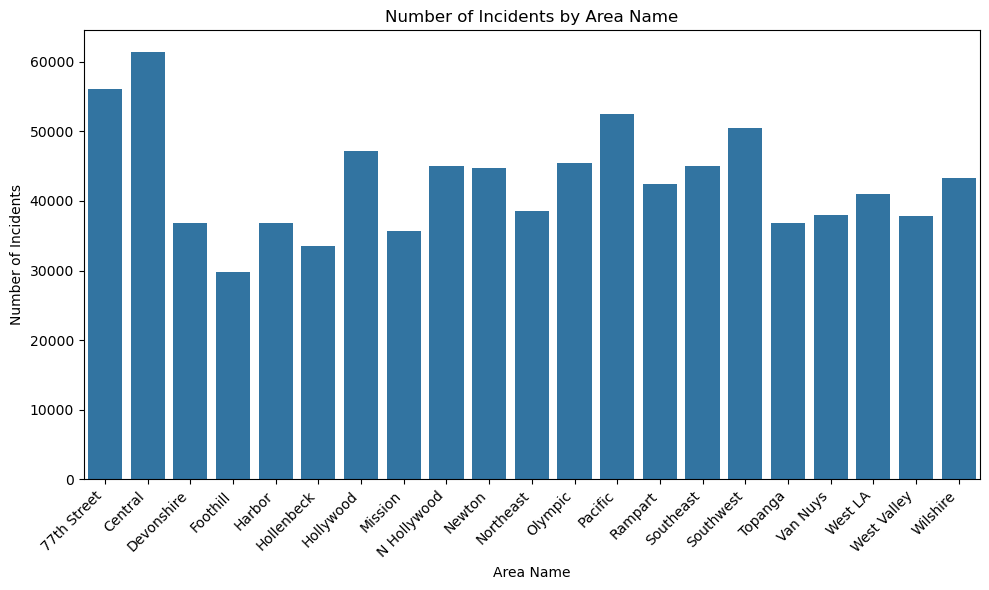

In [18]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data= area, x='AREA NAME', y='DR_NO')
plt.title('Number of Incidents by Area Name')
plt.xlabel('Area Name')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
# Type of crime

crime_type = data.groupby('Crm Cd Desc')['DR_NO'].count().reset_index() 
crime_type


,Crm Cd Desc,DR_NO
0,ARSON,2447
1,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,1045
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",51483
3,ATTEMPTED ROBBERY,4684
4,BATTERY - SIMPLE ASSAULT,72098
...,...,...
134,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",2049
135,VIOLATION OF COURT ORDER,6141
136,VIOLATION OF RESTRAINING ORDER,11357
137,VIOLATION OF TEMPORARY RESTRAINING ORDER,897


In [20]:
area_crime = pd.crosstab(data['AREA NAME'], data['Crm Cd Desc']) 
area_crime 

Crm Cd Desc,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",BIGAMY,...,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER,WEAPONS POSSESSION/BOMBING
AREA NAME,,,,,,,,,,,,,,,,,,,,,
77th Street,192,77,5615,459,4482,7,271,167,0,0,...,9,3020,1632,259,7424,3,228,634,18,2
Central,220,153,3967,451,6652,45,319,382,2,1,...,10,4238,1477,139,4034,137,141,278,11,3
Devonshire,49,14,1263,104,2530,6,57,152,0,0,...,31,1838,701,102,3305,42,336,363,129,0
Foothill,90,52,1641,98,2288,7,67,131,1,0,...,11,1799,809,95,3826,8,379,501,50,3
Harbor,85,23,2229,164,2999,10,78,115,0,0,...,11,2404,1207,295,5183,39,380,1149,18,4
Hollenbeck,97,58,2288,169,3036,12,83,116,0,0,...,6,2282,1161,218,5243,3,372,732,44,1
Hollywood,124,55,2657,280,4357,19,196,272,1,0,...,26,3193,1045,74,3409,64,207,411,22,6
Mission,95,37,1893,160,2469,8,84,190,0,0,...,16,2035,823,135,4940,2,351,974,41,0
N Hollywood,134,32,1875,148,3234,8,94,197,0,1,...,25,2980,1073,178,4204,50,93,103,33,1


In [21]:
# Group by crime description and count occurrences
crime_type = data.groupby('Crm Cd Desc')['DR_NO'].count().reset_index()
crime_type.columns = ['Crm Cd Desc', 'Count']

# Sort the DataFrame by count of occurrences in descending order
top_10_crimes = crime_type.sort_values(by='Count', ascending=False).head(10)

print('Top 10 Crimes')
top_10_crimes

Top 10 Crimes


,Crm Cd Desc,Count
133,VEHICLE - STOLEN,96770
4,BATTERY - SIMPLE ASSAULT,72098
21,BURGLARY FROM VEHICLE,55492
20,BURGLARY,55233
130,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",54643
115,THEFT OF IDENTITY,52405
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",51483
117,THEFT PLAIN - PETTY ($950 & UNDER),46187
73,INTIMATE PARTNER - SIMPLE ASSAULT,44691
113,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),34792


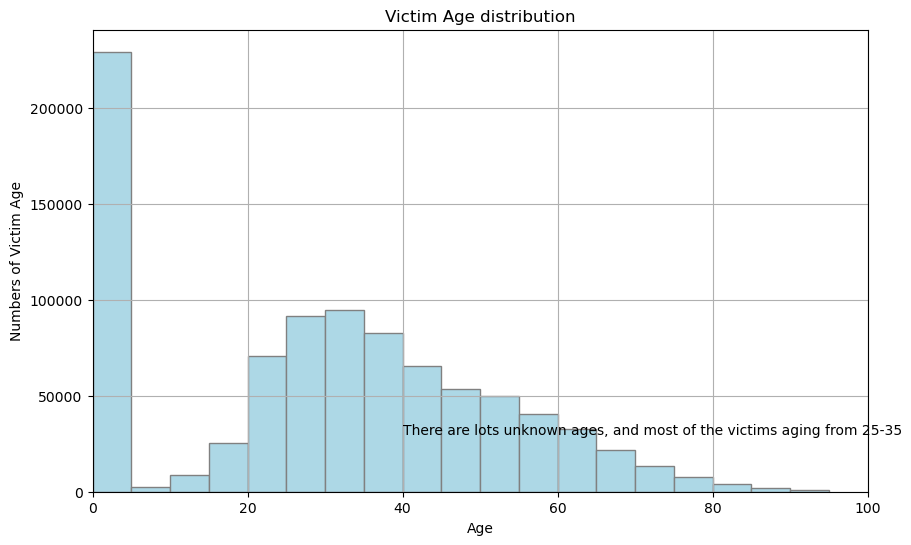

In [22]:
# Filter out rows with unknown ages
crime_filtered = data[data['Vict Age'] != 'Unknown']

# Convert 'Vict Age' to numeric
crime_filtered['Vict Age'] = pd.to_numeric(crime_filtered['Vict Age'])

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(crime_filtered['Vict Age'], bins=range(0, 100, 5), color='lightblue', edgecolor='grey')
plt.title('Victim Age distribution')
plt.xlabel('Age')
plt.ylabel('Numbers of Victim Age')
plt.xlim(0, 100)
plt.ylim(0, None)
plt.grid(True)
plt.text(40, 30000, 'There are lots unknown ages, and most of the victims aging from 25-35', fontsize=10)
plt.show()

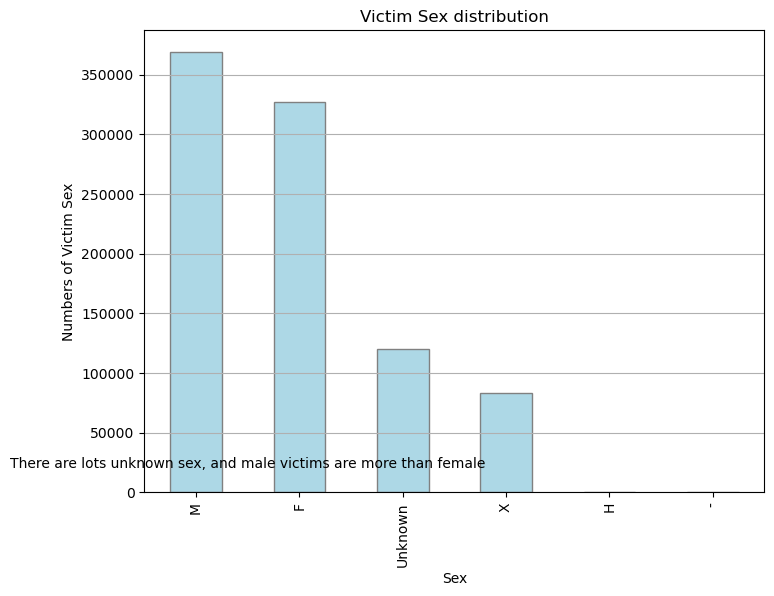

In [23]:
# Create the bar plot
plt.figure(figsize=(8, 6))
data['Vict Sex'].value_counts().plot(kind='bar', color='lightblue', edgecolor='grey')
plt.title('Victim Sex distribution')
plt.xlabel('Sex')
plt.ylabel('Numbers of Victim Sex')
plt.grid(axis='y')
plt.text(0.5, 20000, 'There are lots unknown sex, and male victims are more than female', fontsize=10, ha='center')
plt.show()

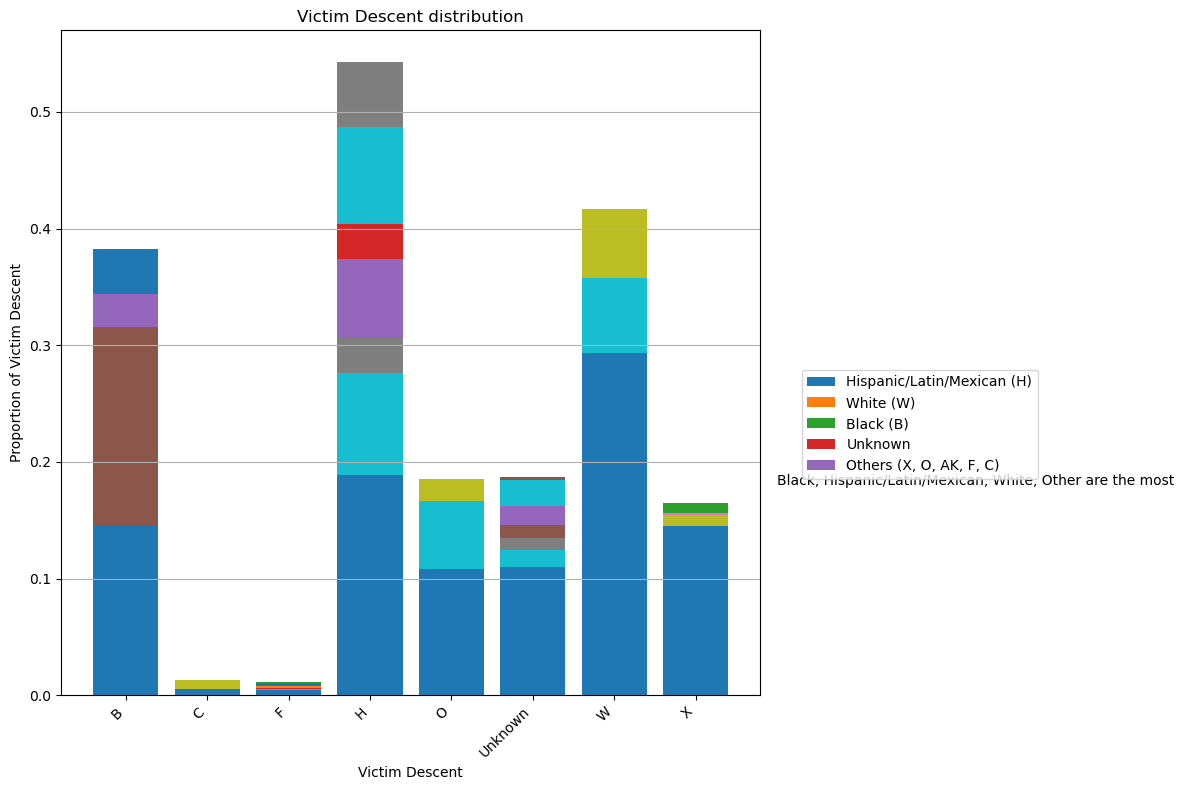

In [24]:


# Filter out 'X' values from 'Vict Descent'
valid_descent_values = ['H', 'W', 'B', 'Unknown', 'X', 'O', 'AK', 'F', 'C']
filtered_data = data[data['Vict Descent'].isin(valid_descent_values)]

# Group by 'AREA NAME' and 'Vict Descent', count occurrences
grouped_data = filtered_data.groupby(['AREA NAME', 'Vict Descent']).size().reset_index(name='count')

# Calculate proportion
grouped_data['prop'] = grouped_data.groupby('AREA NAME')['count'].transform(lambda x: x / x.sum())

# Plot the grouped bar plot
plt.figure(figsize=(12, 8))
for area, group in grouped_data.groupby('AREA NAME'):
    plt.bar(group['Vict Descent'], group['prop'], label=area)

plt.title('Victim Descent distribution')
plt.xlabel('Victim Descent')
plt.ylabel('Proportion of Victim Descent')
plt.text(8, 0.18, 'Black, Hispanic/Latin/Mexican, White, Other are the most', fontsize=10, ha='left')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add legend explaining the meaning of 'H', 'W', 'B', 'Unknown', 'X', 'O', 'AK', 'F', and 'C'
plt.legend(title='Area Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(['Hispanic/Latin/Mexican (H)', 'White (W)', 'Black (B)', 'Unknown', 'Others (X, O, AK, F, C)'], 
           loc='upper left', bbox_to_anchor=(1.05, 0.5))
plt.tight_layout()
plt.show()


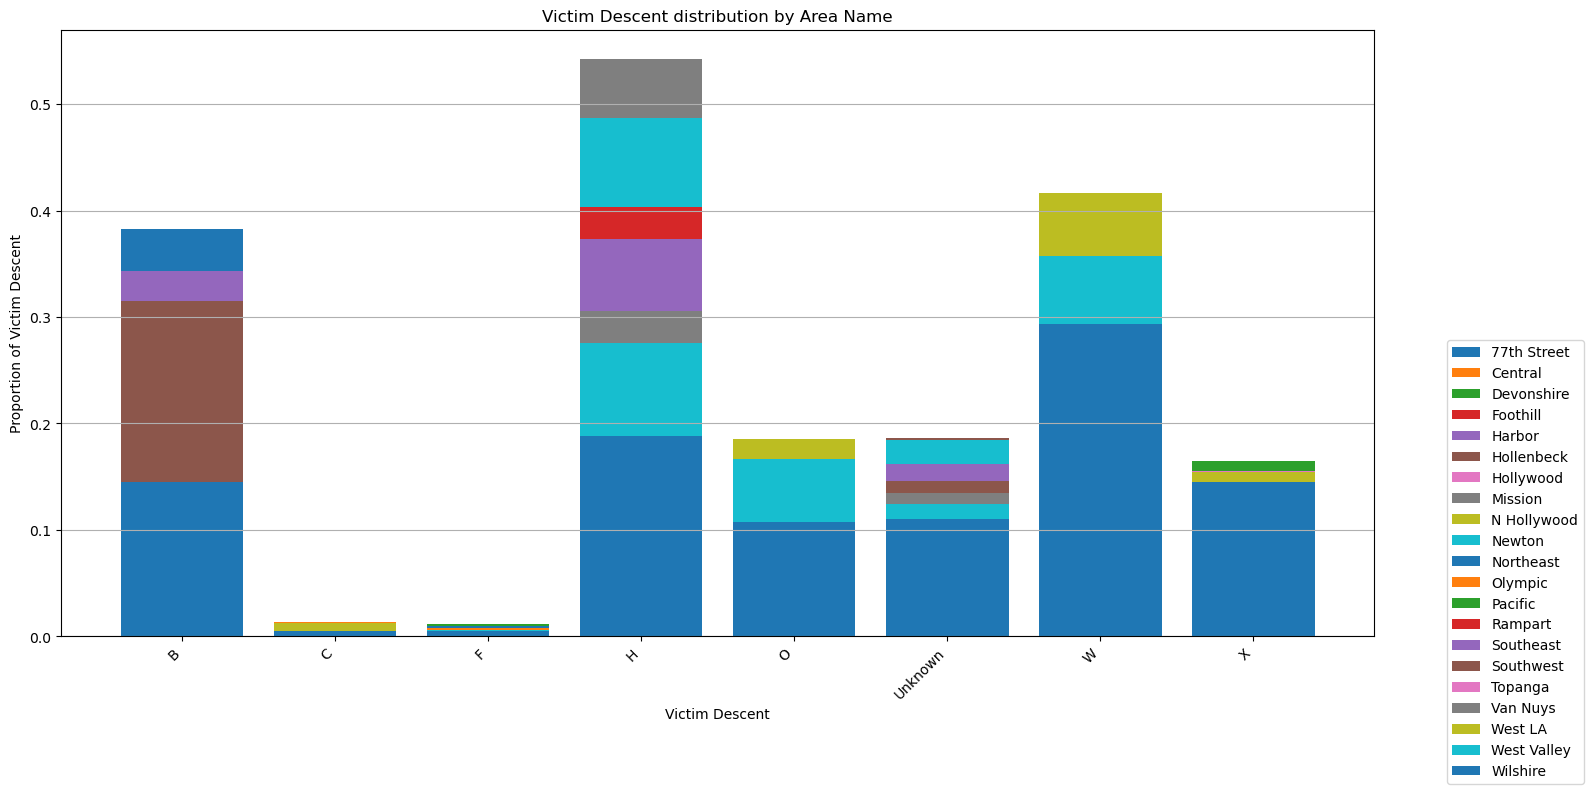

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'crime' is a DataFrame containing your data

# Filter out 'X' values from 'Vict Descent'
valid_descent_values = ['H', 'W', 'B', 'Unknown', 'X', 'O', 'AK', 'F', 'C']
filtered_data = data[data['Vict Descent'].isin(valid_descent_values)]

# Group by 'AREA NAME' and 'Vict Descent', count occurrences
grouped_data = filtered_data.groupby(['AREA NAME', 'Vict Descent']).size().reset_index(name='count')

# Calculate proportion
grouped_data['prop'] = grouped_data.groupby('AREA NAME')['count'].transform(lambda x: x / x.sum())

# Plot the grouped bar plot
plt.figure(figsize=(16, 8))
for area, group in grouped_data.groupby('AREA NAME'):
    plt.bar(group['Vict Descent'], group['prop'], label=area)

plt.title('Victim Descent distribution by Area Name')
plt.xlabel('Victim Descent')
plt.ylabel('Proportion of Victim Descent')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add legend explaining the meaning of 'H', 'W', 'B', 'Unknown', 'X', 'O', 'AK', 'F', and 'C'
plt.legend(title='Area Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 0.5))
plt.tight_layout()
plt.show()
